<a href="https://colab.research.google.com/github/nivyathiruvoth/Global-Terrorism-Analysis/blob/main/EDA_Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

##Terrorism poses a direct threat to the security of the citizens all over the world. It also affects the stability, prosperity and economy of a country. Let us analyze global terrorism data across the years and find out some patterns.

#Let us start the analysis by loading libraries and reading input dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the dataset
location = "/content/drive/MyDrive/Colab Notebooks/project/My project/Global Terrorism Data.csv"
gtd= pd.read_csv(location, encoding = 'ISO-8859-1',low_memory=False)

#Exploring the dataset by checking basic informations

In [4]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
gtd.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
#Obtaining the shape of the dataset
gtd.shape

(181691, 135)

The given data consists of 181691 rows and 135 columns

In [7]:
gtd.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

##What will be the key findings that can be obtained from the given dataset

1.   Number of casualties over the years.
2.   Detecting the country where the effects of terrorism exist the most.
3.   Civilians Deaths Across  Various Countries.
4.   Which terrorist group is carrying out the most number of attacks
5.   Deadliest terrorist groups.
6.   Examining the success rate of defence mechanisms of each country.
7.   Obtaining the most frequently used weapons.
8.   Total number of deaths due to each type of weapon.
9.   Which terrorist group possesses the most diverse weapons?
10.  Increment and decrement of terrorist attacks over the years.
11.  Number of terrorist groups in each region. 
12.  The most vlnerable region to terrorist attacks.
13.  Most affected target types.








#Identifying columns to keep

In [8]:
#Checking column names of our dataset
columns = list(gtd.columns)
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [9]:
#listing the required columns
columns_to_keep = ['eventid','iyear', 'imonth','country','country_txt',
 'region','region_txt','success',
 'attacktype1','attacktype1_txt','targtype1','targtype1_txt',
 'gname','weaptype1', 'weaptype1_txt','nkill','nwound']
print(columns_to_keep)

['eventid', 'iyear', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'gname', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound']


#Creating new data frame with selected columns

In [10]:
#Creating new data frame 
new_gtd= gtd[columns_to_keep]

In [11]:
new_gtd.columns

Index(['eventid', 'iyear', 'imonth', 'country', 'country_txt', 'region',
       'region_txt', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'weaptype1', 'weaptype1_txt', 'nkill',
       'nwound'],
      dtype='object')

In [12]:
#Renaming columns
new_gtd=new_gtd.rename(columns = {'iyear': 'year', 'imonth': 'month', 'country':"country_id",'country_txt':'country_name','region':"region_id",'region_txt':"region_name",'attacktype1':'attacktype_id','attacktype1_txt':'attacktype','targtype1':'targtype_id', 'targtype1_txt':'targtype','weaptype1':"weapon_id",'weaptype1_txt':"weapon",'nkill':"deaths","nwound":'injured'})

#Examining new dataframe and getting basic informations

In [13]:
new_gtd.columns

Index(['eventid', 'year', 'month', 'country_id', 'country_name', 'region_id',
       'region_name', 'success', 'attacktype_id', 'attacktype', 'targtype_id',
       'targtype', 'gname', 'weapon_id', 'weapon', 'deaths', 'injured'],
      dtype='object')

In [14]:
new_gtd.shape

(181691, 17)

In [15]:
new_gtd.describe()

,eventid,year,month,country_id,region_id,success,attacktype_id,targtype_id,weapon_id,deaths,injured
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,131.968501,7.160938,0.889598,3.247547,8.439719,6.447325,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,112.414535,2.933408,0.313391,1.915772,6.653838,2.173435,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,78.000000,5.000000,1.000000,2.000000,3.000000,5.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,98.000000,6.000000,1.000000,3.000000,4.000000,6.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,160.000000,10.000000,1.000000,3.000000,14.000000,6.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,9.000000,22.000000,13.000000,1570.000000,8191.000000


In [16]:
new_gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   year           181691 non-null  int64  
 2   month          181691 non-null  int64  
 3   country_id     181691 non-null  int64  
 4   country_name   181691 non-null  object 
 5   region_id      181691 non-null  int64  
 6   region_name    181691 non-null  object 
 7   success        181691 non-null  int64  
 8   attacktype_id  181691 non-null  int64  
 9   attacktype     181691 non-null  object 
 10  targtype_id    181691 non-null  int64  
 11  targtype       181691 non-null  object 
 12  gname          181691 non-null  object 
 13  weapon_id      181691 non-null  int64  
 14  weapon         181691 non-null  object 
 15  deaths         171378 non-null  float64
 16  injured        165380 non-null  float64
dtypes: float64(2), int64(9), obje

In the new dataframe the columns  "civilians killed"  and "civilians wounded" contain null values. So we need to replace it with 0.

#Cleaning the dataset  

In [17]:
#Replacing nan value with 0.
new_gtd.fillna(value=0,inplace=True)

In [18]:
new_gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   year           181691 non-null  int64  
 2   month          181691 non-null  int64  
 3   country_id     181691 non-null  int64  
 4   country_name   181691 non-null  object 
 5   region_id      181691 non-null  int64  
 6   region_name    181691 non-null  object 
 7   success        181691 non-null  int64  
 8   attacktype_id  181691 non-null  int64  
 9   attacktype     181691 non-null  object 
 10  targtype_id    181691 non-null  int64  
 11  targtype       181691 non-null  object 
 12  gname          181691 non-null  object 
 13  weapon_id      181691 non-null  int64  
 14  weapon         181691 non-null  object 
 15  deaths         181691 non-null  float64
 16  injured        181691 non-null  float64
dtypes: float64(2), int64(9), obje

#1. **Number of casualities over the years**





In [19]:
new_gtd.columns

Index(['eventid', 'year', 'month', 'country_id', 'country_name', 'region_id',
       'region_name', 'success', 'attacktype_id', 'attacktype', 'targtype_id',
       'targtype', 'gname', 'weapon_id', 'weapon', 'deaths', 'injured'],
      dtype='object')

In [20]:
 #Using group by to track number of attacks, number of deaths and number of injured over the years
 df1 = new_gtd.groupby('year').agg({"eventid":"count",'deaths':'sum',"injured":"sum"})

In [21]:
df1.reset_index(inplace=True)

In [22]:
#renaming the columns
df1.rename(columns={"eventid":"num_of_attacks"},inplace=True)
df1.head()

,year,num_of_attacks,deaths,injured
0,1970,651,174.0,212.0
1,1971,471,173.0,82.0
2,1972,568,566.0,409.0
3,1973,473,370.0,495.0
4,1974,581,539.0,865.0


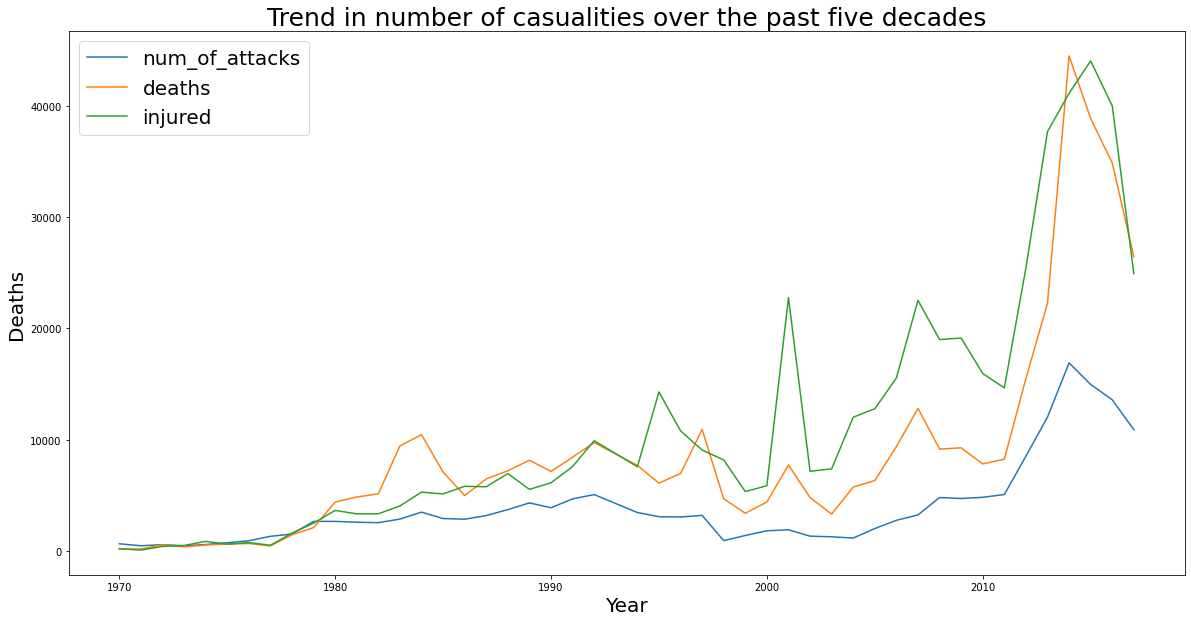

In [23]:
#Plotting graph
plt.rcParams["figure.figsize"]=(20,10)
df1.plot(x="year",y=["num_of_attacks",'deaths','injured'],kind="line",stacked=False).legend(fontsize=20)
plt.title("Trend in number of casualities over the past five decades",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Deaths",fontsize=20)

plt.show()

##**Inferences:**

###The number of attacks and the number of people killed and injured in terrorist attacks have been steadily rising over the years. There has been a slight decline over the last few years.

#2.**Detecting the country where the effects of terrorism exist the most** 

In [24]:
#calculating number of attacks in each country
country = new_gtd.groupby('country_name')['country_id'].count().reset_index().rename(columns = {'country_id':'number of attacks'})
country.sort_values(by="number of attacks",ascending=False,inplace=True)

In [25]:
country.head()

,country_name,number of attacks
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306


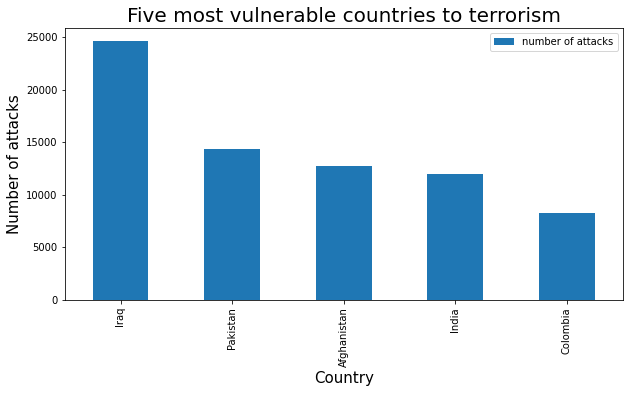

In [26]:
#ploting the graph using matplotlib
plt.rcParams["figure.figsize"]=(10,5)
country.head().plot(x="country_name",y="number of attacks",kind="bar")
plt.title("Five most vulnerable countries to terrorism",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

##**Inferences**

###Among countries Iraq is the most vulnerable to terrorist attacks.

#**3.Civilian Deaths Across  Various Countries**

In [27]:
new_gtd.fillna(value=0,inplace=True)

In [28]:
#Getting five countries which lost more number of lives in terror attacks
countries= new_gtd.groupby('country_name')['deaths'].sum().reset_index()
countries.sort_values(by = 'deaths', ascending = False,inplace=True)

In [29]:
countries.head()

,country_name,deaths
84,Iraq,78589.0
0,Afghanistan,39384.0
134,Pakistan,23822.0
130,Nigeria,22682.0
80,India,19341.0


In [30]:
#listing out the data of countries who lost more number of lives in terror attacks
deaths1 = new_gtd[(new_gtd['country_name']== 'Iraq')|(new_gtd['country_name']== 'India')|(new_gtd['country_name']== 'Pakistan')|(new_gtd['country_name']== 'Afghanistan')|(new_gtd['country_name']== 'Nigeria')]

In [31]:
#listing out the data of number of deaths in rest of the countries
deaths2 = new_gtd[~((new_gtd['country_name']== 'Iraq')|(new_gtd['country_name']== 'India')|(new_gtd['country_name']== 'Pakistan')|(new_gtd['country_name']== 'Afghanistan')|(new_gtd['country_name']== 'Nigeria'))]

In [32]:
deaths_a=deaths1.groupby(["year","country_name"]).agg({"deaths":"sum"}).unstack()

In [33]:
deaths_a.fillna(value=0,inplace=True)
deaths_a.head()

deaths                            
country_name Afghanistan India Iraq Nigeria Pakistan
year                                                
1970                 0.0   0.0  0.0     0.0      4.0
1972                 0.0   0.0  0.0     0.0      0.0
1973                 0.0   0.0  0.0     0.0      0.0
1974                 0.0   0.0  0.0     0.0      0.0
1975                 0.0   4.0  0.0     0.0      1.0

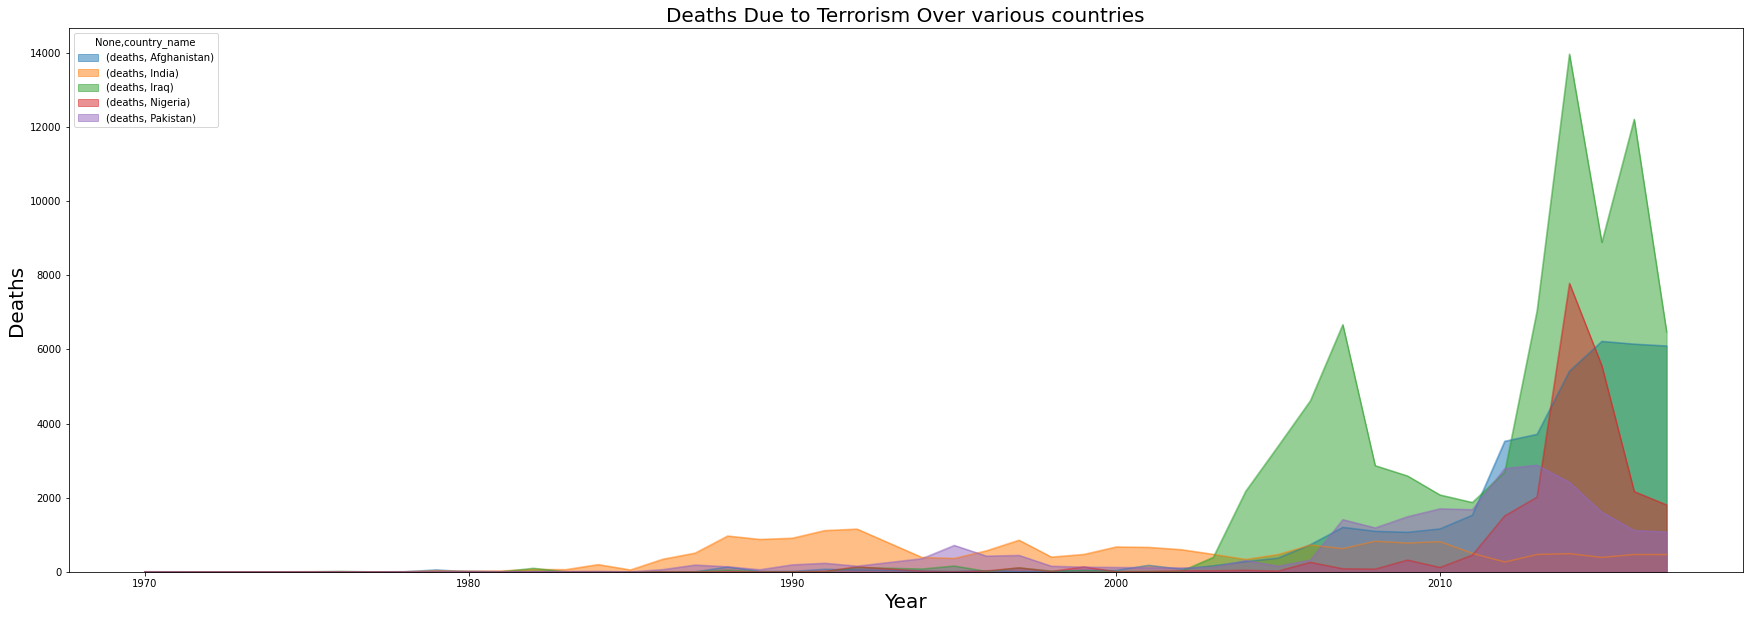

In [34]:
plt.rcParams["figure.figsize"]=(30,10)
deaths_a.plot.area(stacked=False)
plt.title('Deaths Due to Terrorism Over various countries',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Deaths',fontsize=20)

plt.show()


In [35]:
#Total number of deaths in the world due to terror attacks till 2017
deaths_in_the_world=countries.sum()["deaths"]
print(f"Total number of deaths in the world due to terror attack till 2017 is {deaths_in_the_world}")

Total number of deaths in the world due to terror attack till 2017 is 411868.0


In [36]:
#Calculating total number of deaths occurred in Iraq, Pakistan, Afghanistan, India and Nigeria due to terror attacks till 2017 
deaths_in_5_most_affected_countries=countries.head().sum()["deaths"]
print(f"Total number of deaths in the countries Iraq, Pakistan, Afghanistan, India and Nigeria due to terror attack till 2017 is {deaths_in_5_most_affected_countries}")

Total number of deaths in the countries Iraq, Pakistan, Afghanistan, India and Nigeria due to terror attack till 2017 is 183818.0


In [37]:
#total number of deaths in rest of the countries due to terror attacks till 2017 
deaths_in_rest_of_the_countries=deaths_in_the_world-deaths_in_5_most_affected_countries
print(f"Total number of deaths in the rest of the countries countries due to terror attack till 2017 is {deaths_in_rest_of_the_countries}")

Total number of deaths in the rest of the countries countries due to terror attack till 2017 is 228050.0


In [38]:
#Calculating percentage of deaths in these 5 countries to the same in the world
per_death_in_5_countries_to_the_world=round((deaths_in_5_most_affected_countries*100/deaths_in_the_world),2)
print(f"Percentage of deaths in the worst affected 5 countries to the same in the world {per_death_in_5_countries_to_the_world}")

Percentage of deaths in the worst affected 5 countries to the same in the world 44.63


In [39]:
#Calculating percentage of deaths in these 5 countries to the same in rest of the countries 
per_death_in_5_countries_to_the_rest=deaths_in_5_most_affected_countries*100/deaths_in_rest_of_the_countries
print(f"Percentage of deaths in the worst affected 5 countries to the rest of the countries is {round(per_death_in_5_countries_to_the_rest,2)}")

Percentage of deaths in the worst affected 5 countries to the rest of the countries is 80.6


##**Inferences**

###Iraq, Pakistan, Afghanistan, India and Nigeria are the countries that have lost the most lives in terrorist attacks. The death toll in these countries  due to terrorist attacks is 80% of the total deaths in other countries and 45% of the total deaths in the world till 2017 due to the same.


#4.**Which terrorist group is carrying out the most attacks**

In [40]:
df=new_gtd.groupby("gname").agg({'gname':'count'}).rename(columns={"gname":"num_of_attacks"}).reset_index()
df.head()

,gname,num_of_attacks
0,1 May,10
1,14 K Triad,4
2,14 March Coalition,1
3,14th of December Command,3
4,15th of September Liberation Legion,1


In [41]:
df.sort_values(by='num_of_attacks',ascending=False,inplace=True)

In [42]:
df.head()

,gname,num_of_attacks
3408,Unknown,82782
3138,Taliban,7478
1535,Islamic State of Iraq and the Levant (ISIL),5613
2948,Shining Path (SL),4555
1120,Farabundo Marti National Liberation Front (FMLN),3351


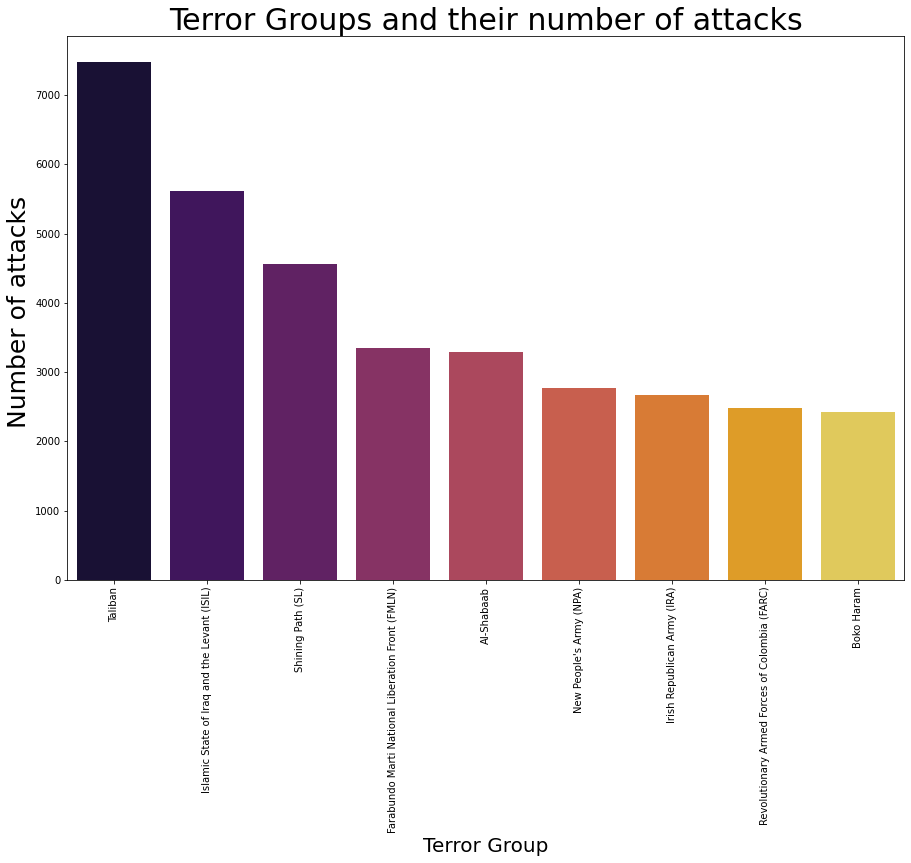

In [43]:
plt.rcParams["figure.figsize"]=(15,10)
sns.barplot(data = df[1:10], x = 'gname', y = 'num_of_attacks', palette ='inferno').tick_params(axis='x', rotation=90)
plt.title('Terror Groups and their number of attacks', fontsize = 30)
plt.xlabel('Terror Group', fontsize = 20)
plt.ylabel('Number of attacks ', fontsize = 25)
plt.show()

##**Inferences**
###The Taliban and Islamic State of Iraq and the Levant (ISIL) carried out more attacks.

#**5.Deadliest Terror Groups**

In [44]:
df10=new_gtd.groupby("gname")["deaths"].sum().reset_index().rename(columns = {'gname':'Terror Group'}).sort_values(by ='deaths',ascending = False)

In [45]:
df10[1:12]

,Terror Group,deaths
1535,Islamic State of Iraq and the Levant (ISIL),38923.0
3138,Taliban,29410.0
704,Boko Haram,20328.0
2948,Shining Path (SL),11601.0
1864,Liberation Tigers of Tamil Eelam (LTTE),10989.0
177,Al-Shabaab,9330.0
1120,Farabundo Marti National Liberation Front (FMLN),8065.0
2276,Nicaraguan Democratic Force (FDN),6662.0
3165,Tehrik-i-Taliban Pakistan (TTP),6042.0
2717,Revolutionary Armed Forces of Colombia (FARC),5661.0


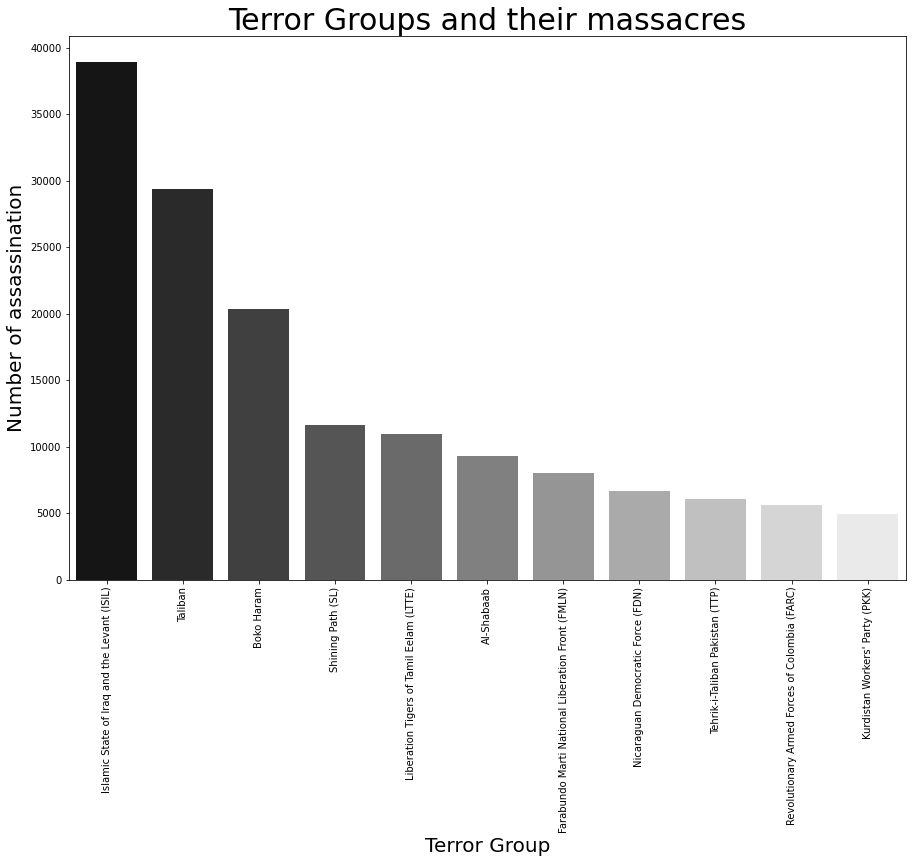

In [46]:
plt.rcParams["figure.figsize"]=(15,10)
sns.barplot(data = df10[1:12], x = 'Terror Group', y = 'deaths', palette = 'gray').tick_params(axis='x', rotation=90)
plt.title('Terror Groups and their massacres', fontsize = 30)
plt.xlabel('Terror Group', fontsize = 20)
plt.ylabel('Number of assassination', fontsize = 20)
plt.show()

**Inferences:**

Islamic State of Iraq and the Levant (ISIL)	has claimed the most lives.

#6. **Examining the success rate of defence mechanisms of each country.**

In [47]:
#Creating a new dataframe with required columns for the given problem
df0=new_gtd[['country_id','country_name','success']]

In [48]:
df0.head()

,country_id,country_name,success
0,58,Dominican Republic,1
1,130,Mexico,1
2,160,Philippines,1
3,78,Greece,1
4,101,Japan,1


In [49]:
#Creating separate dataframe for success and failure of terrorist attacks in each country 
success=df0[df0['success']==1]
failure=df0[df0['success']==0]

In [50]:
success.head()

,country_id,country_name,success
0,58,Dominican Republic,1
1,130,Mexico,1
2,160,Philippines,1
3,78,Greece,1
4,101,Japan,1


In [51]:
failure=failure.rename(columns={'success':'failure'})
failure.head()

,country_id,country_name,failure
6,218,Uruguay,0
10,217,United States,0
23,217,United States,0
39,160,Philippines,0
43,217,United States,0


In [52]:
#Counting the number of successes of terrorist attacks in each country
df1=success.groupby("country_name").agg({"success":"count"})
df1.head()


,success
country_name,
Afghanistan,11141
Albania,64
Algeria,2561
Andorra,1
Angola,486


In [53]:
#Counting the number of failures of terrorist attacks in each country
df2=failure.groupby("country_name").agg({"failure":"count"})
df2.head()

,failure
country_name,
Afghanistan,1590
Albania,16
Algeria,182
Angola,13
Argentina,101


In [54]:
df1.shape

(202, 1)

In [55]:
df2.shape

(174, 1)

In [56]:
#Merging the two dataframes success and failure using inner join on country name 
merged_df=pd.merge(df1,df2,how='inner', left_on='country_name',right_on='country_name')
merged_df

,success,failure
country_name,,
Afghanistan,11141,1590
Albania,64,16
Algeria,2561,182
Angola,486,13
Argentina,714,101
...,...,...
Yemen,2837,510
Yugoslavia,179,24
Zaire,45,5


In [57]:
#Calculating success rate of the terrorist attack in each country
merged_df["terrorist_success_rate"]=merged_df["success"]*100/(merged_df["success"]+merged_df["failure"])
merged_df

,success,failure,terrorist_success_rate
country_name,,,
Afghanistan,11141,1590,87.510800
Albania,64,16,80.000000
Algeria,2561,182,93.364929
Angola,486,13,97.394790
Argentina,714,101,87.607362
...,...,...,...
Yemen,2837,510,84.762474
Yugoslavia,179,24,88.177340
Zaire,45,5,90.000000


In [58]:
#calculating defence success rate of each country
merged_df["defence_success_rate"]=100-merged_df["terrorist_success_rate"]

In [59]:
merged_df

,success,failure,terrorist_success_rate,defence_success_rate
country_name,,,,
Afghanistan,11141,1590,87.510800,12.489200
Albania,64,16,80.000000,20.000000
Algeria,2561,182,93.364929,6.635071
Angola,486,13,97.394790,2.605210
Argentina,714,101,87.607362,12.392638
...,...,...,...,...
Yemen,2837,510,84.762474,15.237526
Yugoslavia,179,24,88.177340,11.822660
Zaire,45,5,90.000000,10.000000


In [60]:
merged_df.reset_index(inplace=True)
#sorting the data frame by defence success rate
merged_df.sort_values(by="defence_success_rate",ascending=False,inplace=True)

#Checking the strongest 5 countries based on defence 
merged_df.head()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
50,Gambia,1,2,33.333333,66.666667
69,Ireland,139,168,45.276873,54.723127
154,Turkmenistan,1,1,50.000000,50.000000
106,New Zealand,11,9,55.000000,45.000000
163,Vietnam,7,5,58.333333,41.666667


In [61]:
#Checking the weakest 5 countries based on defence
merged_df.tail()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
102,Namibia,147,4,97.350993,2.649007
3,Angola,486,13,97.394790,2.605210
43,El Salvador,5227,93,98.251880,1.748120
128,Senegal,116,2,98.305085,1.694915
107,Nicaragua,1939,31,98.426396,1.573604


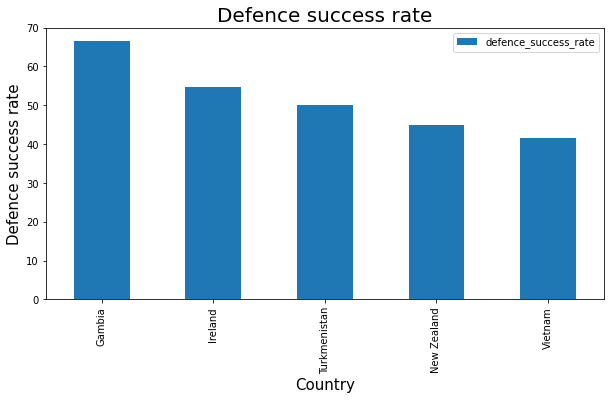

In [62]:
#plotting graph of the strongest 5 country based on defense_success_rate 
plt.rcParams["figure.figsize"]=(10,5)
merged_df.head().plot(x="country_name",y="defence_success_rate",kind="bar")
plt.title("Defence success rate",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Defence success rate",fontsize=15)
plt.show()

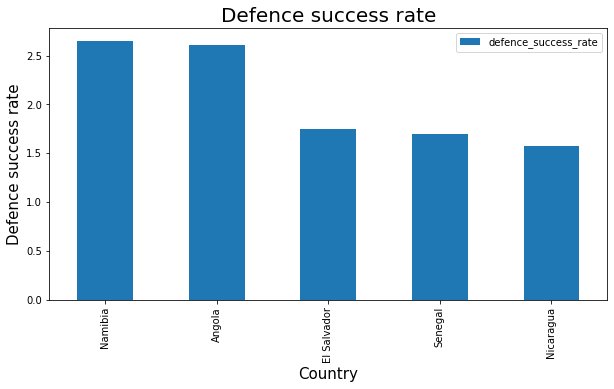

In [63]:
#plotting graph of the weakest 5 country based on defense_success_rate 
merged_df.tail().plot(x="country_name",y="defence_success_rate",kind="bar")
plt.title("Defence success rate",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Defence success rate",fontsize=15)
plt.show()

##**Inferences:**
###Gambia, Ireland, Turkmenistan, New Zealand and Vietnam have the strongest defence mechanism rate against terrorist attacks. Nicaragua, Senegal, El Salvador, Angola and Namibia are the countries with weakest defence mechanism. Which means they need more support from the counter terrorism committee.

#7. **Most frequently used weapons**

In [64]:
#obtaining dataframe containing weapon type and frequency of usage
weapon=new_gtd["weapon"].value_counts().reset_index().rename(columns={"index":"weapon type","weapon":"frequency of usage"})

In [65]:
weapon.sort_values(by="frequency of usage",ascending=False,inplace=True)

In [66]:
weapon

,weapon type,frequency of usage
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


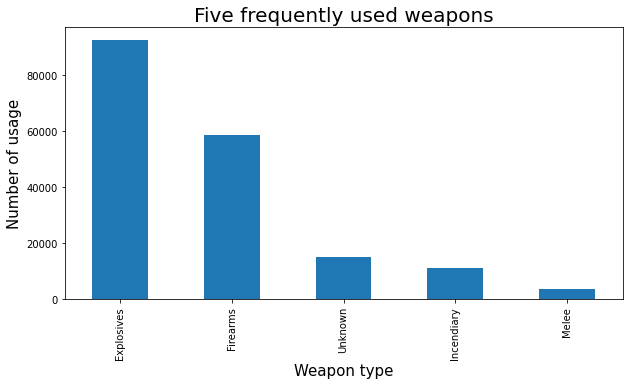

In [67]:
#ploting graph
new_gtd["weapon"].value_counts().head().plot(kind="bar")
plt.rcParams["figure.figsize"]=(10,5)
plt.title("Five frequently used weapons",fontsize=20)
plt.xlabel("Weapon type",fontsize=15)
plt.ylabel("Number of usage",fontsize=15)
plt.show()

##**Inferences:**

###Most frequently used weapons are explosives and firearms.

# 8. **Total number of casualities due to weapons types**

In [68]:
 gtd_df3 = new_gtd.groupby('weapon').agg({'deaths':'sum',"injured":"sum"}).reset_index().sort_values("deaths", ascending=False)

In [69]:
gtd_df3.head(20)


,weapon,deaths,injured
4,Firearms,174894.0,77219.0
2,Explosives,174277.0,385904.0
10,Unknown,42620.0,17575.0
6,Melee,10575.0,5495.0
5,Incendiary,5476.0,5530.0
11,Vehicle (not to include vehicle-borne explosiv...,3184.0,17121.0
1,Chemical,624.0,13825.0
7,Other,123.0,105.0
9,Sabotage Equipment,83.0,286.0
0,Biological,9.0,805.0


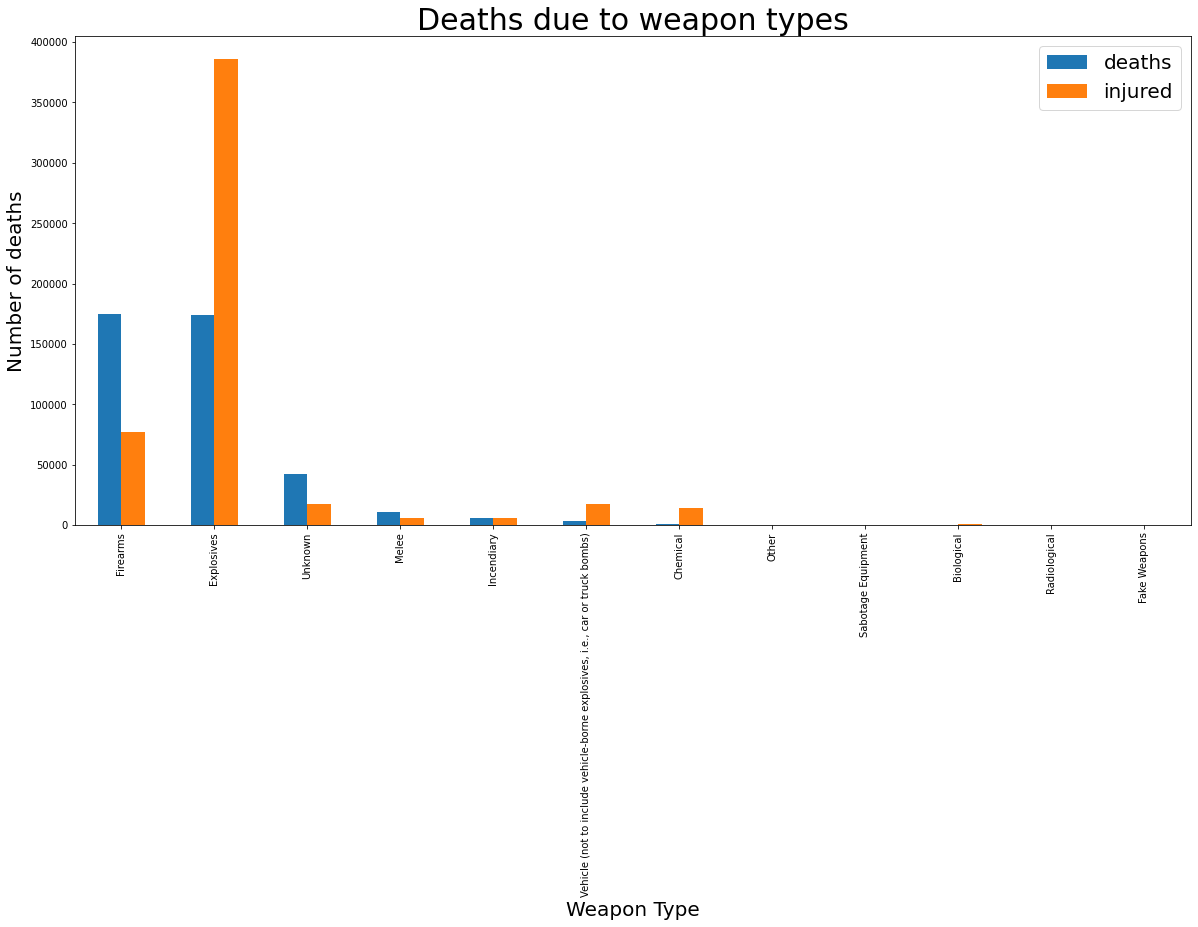

In [70]:
plt.rcParams["figure.figsize"]=(20,9)

gtd_df3.plot(x="weapon",y=["deaths","injured"],kind="bar",stacked=False).legend(fontsize=20)
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Deaths due to weapon types",fontsize=30)
plt.xlabel("Weapon Type",fontsize=20)
plt.ylabel("Number of deaths",fontsize=20)
plt.show()


##**Inference**

##Explosives and Firearms are the most dangerous weapons in a terrorist arsenal, killing nearly a hundred thousand people.

#9. **Which terrorist group contain the most diverse weapon**

In [71]:
#creating a new data frame with required columns
df1=new_gtd[["gname","weapon"]]

In [72]:
df2=df1.groupby("gname")["weapon"].unique().reset_index()
df2

,gname,weapon
0,1 May,"[Firearms, Explosives]"
1,14 K Triad,[Incendiary]
2,14 March Coalition,[Firearms]
3,14th of December Command,[Explosives]
4,15th of September Liberation Legion,[Explosives]
...,...,...
3532,Zulu Miners,[Unknown]
3533,Zuwar al-Imam Rida,[Firearms]
3534,Zviadists,[Firearms]
3535,Zwai Tribe,[Firearms]


In [73]:
#Creating a new column with the list of unique weapons possessed by each terrorist groups.
df2['number of unique weapons'] = df2['weapon'].str.len()
df2.sort_values(by='number of unique weapons', ascending=False,inplace=True)

In [74]:
df2.head(10)

,gname,weapon,number of unique weapons
3408,Unknown,"[Unknown, Explosives, Incendiary, Firearms, Ch...",12
3138,Taliban,"[Unknown, Explosives, Firearms, Incendiary, Me...",10
1535,Islamic State of Iraq and the Levant (ISIL),"[Unknown, Explosives, Firearms, Melee, Sabotag...",9
2253,Neo-Nazi extremists,"[Incendiary, Explosives, Unknown, Melee, Firea...",9
2717,Revolutionary Armed Forces of Colombia (FARC),"[Firearms, Unknown, Explosives, Melee, Incendi...",8
1344,Hamas (Islamic Resistance Movement),"[Explosives, Melee, Firearms, Unknown, Incendi...",8
1963,Maoists,"[Unknown, Firearms, Explosives, Incendiary, Me...",8
1800,Kurdistan Workers' Party (PKK),"[Explosives, Unknown, Firearms, Melee, Incendi...",8
2390,Palestinians,"[Explosives, Firearms, Unknown, Incendiary, Me...",8
2811,Right-wing extremists,"[Incendiary, Unknown, Other, Chemical, Melee, ...",8


In [75]:
#Dropping the row of group name "unknown" 
df2.drop(3408,inplace=True)

In [76]:
df2.head()

,gname,weapon,number of unique weapons
3138,Taliban,"[Unknown, Explosives, Firearms, Incendiary, Me...",10
1535,Islamic State of Iraq and the Levant (ISIL),"[Unknown, Explosives, Firearms, Melee, Sabotag...",9
2253,Neo-Nazi extremists,"[Incendiary, Explosives, Unknown, Melee, Firea...",9
2717,Revolutionary Armed Forces of Colombia (FARC),"[Firearms, Unknown, Explosives, Melee, Incendi...",8
1344,Hamas (Islamic Resistance Movement),"[Explosives, Melee, Firearms, Unknown, Incendi...",8


In [77]:
Taliban=list(df2["weapon"][0:1])

In [78]:
print(Taliban[0])

['Unknown' 'Explosives' 'Firearms' 'Incendiary' 'Melee' 'Radiological'
 'Sabotage Equipment' 'Chemical' 'Other'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']


In [79]:
ISIL=list(df2["weapon"][1:2])

In [80]:
print(ISIL[0])

['Unknown' 'Explosives' 'Firearms' 'Melee' 'Sabotage Equipment'
 'Incendiary' 'Other' 'Chemical'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']


In [81]:
Neo_Nazi_extremists	= list(df2["weapon"][2:3])
print(Neo_Nazi_extremists[0])

['Incendiary' 'Explosives' 'Unknown' 'Melee' 'Firearms' 'Chemical'
 'Sabotage Equipment' 'Fake Weapons'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']


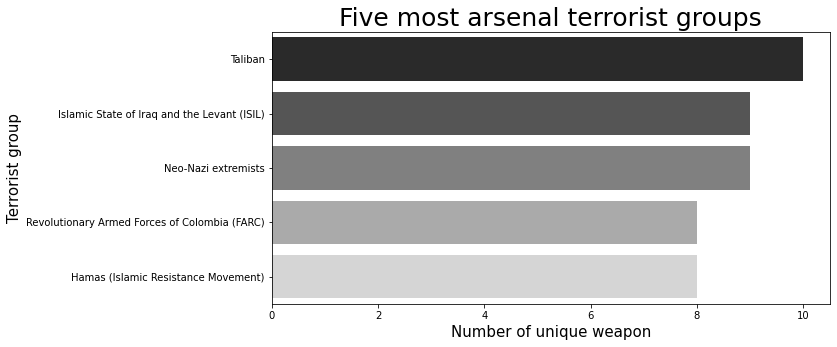

In [82]:
plt.rcParams["figure.figsize"]=(10,5)
sns.barplot(data = df2.head(), x = 'number of unique weapons', y = 'gname', palette = 'gist_gray')
sns.color_palette("mako", as_cmap=True)
plt.title("Five most arsenal terrorist groups",fontsize=25)
plt.ylabel("Terrorist group",fontsize=15)
plt.xlabel("Number of unique weapon",fontsize=15)
# Show the plot
plt.show()


##**Inferences**

###Taliban possess the most number of unique weapons among the terrorist groups. They are in possession of explosives, Firearms, Incendiary, Melee, Radiological, Sabotage Equipment, Chemical, Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs) and other unidentified weapons.
###Islamic State of Iraq and the Levant (ISIL) and Neo-Nazi extremists are second largest in terms of diverse weapons.
###These terrorist groups pose a great threat to the lives and property of the people. 


#10. **Analyzing increment and decrement of global terrorist attacks over the years**

In [83]:
#calculating number of attacks in each year
no_of_attacks = new_gtd.groupby('year')['eventid'].count().reset_index().rename(columns = {'year':'year', 'eventid':'number of attacks'})


In [84]:
no_of_attacks.head()

,year,number of attacks
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


In [85]:
#Obtaining the years in which most number of terrorist attacks happened
no_of_attacks.sort_values(by="number of attacks",ascending=False).head()

,year,number of attacks
43,2014,16903
44,2015,14965
45,2016,13587
42,2013,12036
46,2017,10900


In [86]:
#Obtaining the years in which least number of terrorist attacks happened
no_of_attacks.sort_values(by="number of attacks",ascending=False).tail()

,year,number of attacks
0,1970,651
4,1974,581
2,1972,568
3,1973,473
1,1971,471


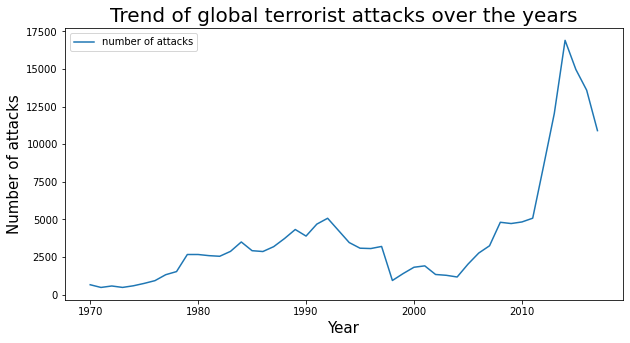

In [87]:
#fixing graph size
plt.rcParams['figure.figsize']=(10,5)
#ploting graph
no_of_attacks.plot(x='year', y='number of attacks', kind='line') 
plt.title("Trend of global terrorist attacks over the years",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

In [88]:
#Identifying the unique years in which terrorist attacks happened
new_gtd.year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

##**Inferences**

###It was found that terrorist attacks were relatively rare in the 1970s. Terrorist attacks have been on the rise for years. After 1992, it began to decline. The number of attacks has increased again since 2004, growing rapidly since 2011 and soaring in 2014. Slightly reduced after 2014. The dataset does not contain information about the 1993 terrorist attacks.



#11.**Number of terrorist groups in each region**

In [89]:
#Counting number of unique groups in each region 
gtd1=new_gtd.groupby("region_name").agg({"gname":"nunique"}).sort_values(by="gname",ascending=False)
gtd1.rename(columns={"gname":"num_ter_groups"},inplace=True)

In [90]:
gtd1.reset_index(inplace=True)
gtd1

,region_name,num_ter_groups
0,Western Europe,866
1,Middle East & North Africa,739
2,South Asia,591
3,Sub-Saharan Africa,492
4,South America,363
5,North America,300
6,Central America & Caribbean,217
7,Southeast Asia,215
8,Eastern Europe,157
9,East Asia,82


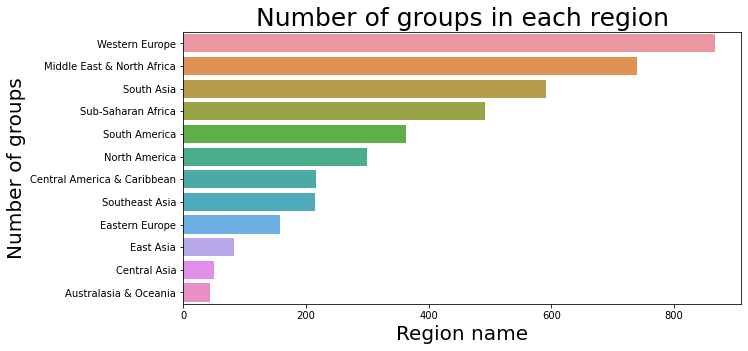

In [91]:
#plotting graph of the weakest 5 country based on defense_success_rate 
sns.barplot(data = gtd1, y="region_name",x="num_ter_groups")
plt.rcParams["figure.figsize"]=(25,7)
plt.title("Number of groups in each region",fontsize=25)
plt.xlabel("Region name",fontsize=20)
plt.ylabel("Number of groups",fontsize=20)
# Show the plot
plt.show()

##**Inferences:**

###Western Europe has more terrorist groups. They need to take more preventive actions towards the terrorist activities. 




#12.**Identifying the most affected region by terrorism**

In [92]:
#Getting the subset of the data frame with required columns for the given problem
new_gtd[['country_id', 'country_name', 'region_id','region_name']].head()

,country_id,country_name,region_id,region_name
0,58,Dominican Republic,2,Central America & Caribbean
1,130,Mexico,1,North America
2,160,Philippines,5,Southeast Asia
3,78,Greece,8,Western Europe
4,101,Japan,4,East Asia


In [93]:
#listing out top 5 most affected region
region=new_gtd['region_name'].value_counts()[:5].reset_index()

In [94]:
region

,index,region_name
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639


In [95]:
region.rename(columns={"index":"region","region_name":"number of attacks"})

,region,number of attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639


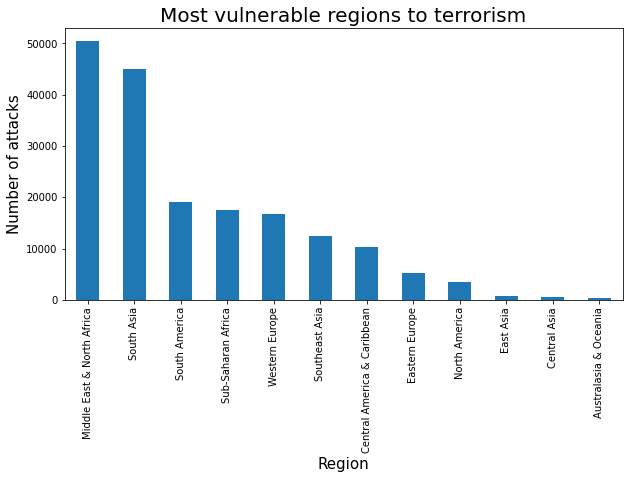

In [96]:
#ploting the graph using matplotlib
plt.rcParams["figure.figsize"]=(10,5)
new_gtd['region_name'].value_counts().plot(kind="bar")
plt.title("Most vulnerable regions to terrorism",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

##**Inference**
###Middle East & North Africa is the worst hit region by terrorists.

#13.**Most vulnerable target types**


In [97]:
new_gtd.columns

Index(['eventid', 'year', 'month', 'country_id', 'country_name', 'region_id',
       'region_name', 'success', 'attacktype_id', 'attacktype', 'targtype_id',
       'targtype', 'gname', 'weapon_id', 'weapon', 'deaths', 'injured'],
      dtype='object')

In [98]:
df1= new_gtd.targtype.value_counts().reset_index().rename(columns = {'index':'Target type','targtype':'Number of attacks' })

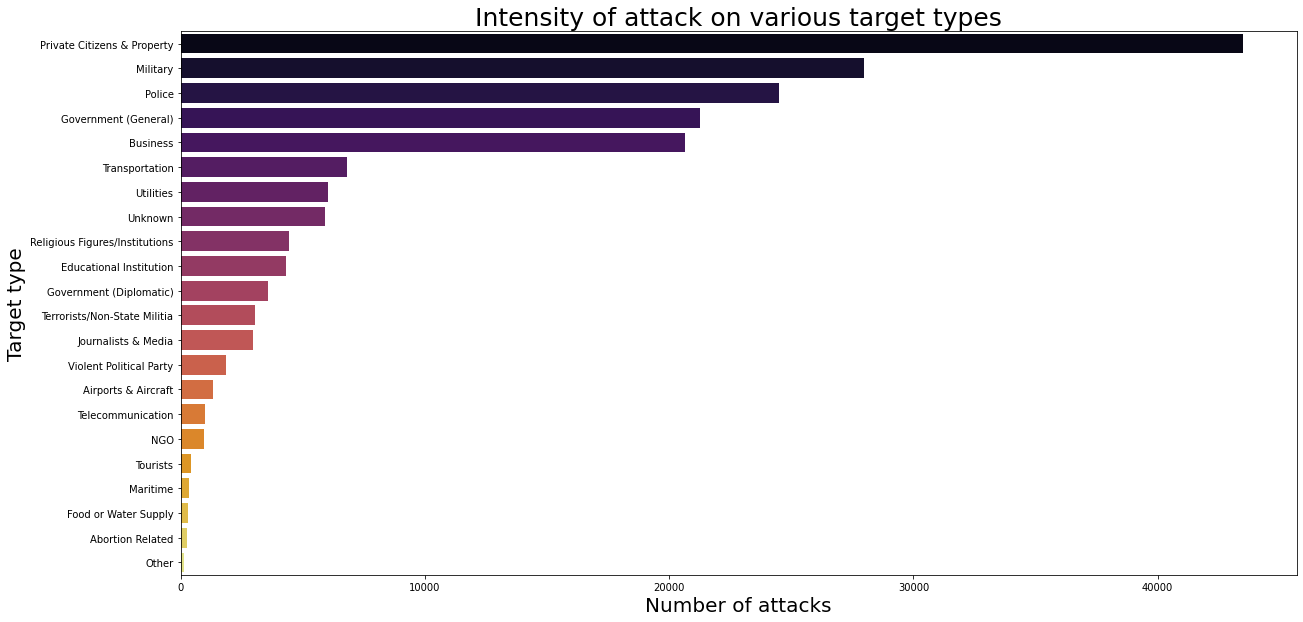

In [99]:
plt.rcParams["figure.figsize"]=(20,10)
sns.barplot(data = df1,x = 'Number of attacks',y = 'Target type', ci = None,palette ='inferno' )
plt.title("Intensity of attack on various target types",fontsize=25)
plt.xlabel("Number of attacks",fontsize=20)
plt.ylabel("Target type",fontsize=20)
plt.show()

In [100]:
df1.head()

,Target type,Number of attacks
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669


##**Inferences**

##Private citizens and property are the weakest terrorist targets.

#**Conclusion**

*  It was found that terrorist attacks were relatively less in the 1970s. Terrorist activities have been on the rise over the years. 2014 witnessed the highest number of terror attacks so far.
*   The number of people killed and injured in terrorist attacks has been steadily increasing over the years.
*   Among the countries, Iraq is the most vulnerable to terrorist attacks.
*   Iraq, Pakistan, Afghanistan, India and Nigeria are the countries that have lost the most number of lives in terrorist attacks. 
*   The Gambia, Ireland, Turkmenistan, New Zealand and Vietnam have the strongest defense against terrorist attacks. Nicaragua, Senegal, El Salvador, Angola and Namibia are the countries with the weakest defenses. That means they need more support from the anti-terrorism committee.
*   The Middle East & North Africa is the worst hit region by terrorists. There are more extremist groups in Western Europe. They need to take more preventive measures against terrorist activities.
*   Taliban possess the most number of unique weapons among the terrorist groups. Taliban and Islamic State of Iraq and the Levant(ISIL) are those who carried out more attacks. Islamic State of Iraq and the Levant (ISIL) has claimed the most lives. These extremist groups pose a great threat to the lives and property of the people.
*   Firearms and explosives are the most dangerous weapons in a terrorist arsenal, killing nearly a hundred thousand people. They are also the most frequently used weapons.
*   Private citizens and property are the weakest terrorist targets.

